# 1.Import Dependencies/Libs

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import math
import datetime
import subprocess

# 2. Data Collection

## 2.1 Collecting Data

### 2.1.1 VIETNAMESE COVID DATA GENERAL INFO

In [2]:
#who_covid_data:

who_covid_data = pd.read_csv('data\owid-covid-data.csv')

who_covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2/24/2020,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2/25/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2/26/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2/27/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2/28/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92126,ZWE,Africa,Zimbabwe,5/25/2021,38706.0,10.0,15.857,1587.0,1.0,0.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92127,ZWE,Africa,Zimbabwe,5/26/2021,38819.0,113.0,29.571,1589.0,2.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92128,ZWE,Africa,Zimbabwe,5/27/2021,38854.0,35.0,31.286,1592.0,3.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92129,ZWE,Africa,Zimbabwe,5/28/2021,38918.0,64.0,36.286,1592.0,0.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


### 2.1.2 VIETNAMESE CASE BY REGION

In [3]:
# vietnamese population by regions + current cases:

vietnam_cases_by_region = pd.read_csv("data/vietnamesePopulation.csv")
vietnam_cases_by_region

vietnam_cases_by_region.dtypes

name           object
population      int64
area            int64
covidcases      int64
lat           float64
long          float64
dtype: object

## 2.2 Data Cleaning

### TODO: 
- Filter to Vietnam COVID data
- Change all NULL DATA ( NaN) to -1
- Change date data to string
- Calculate some percentages
 

### 2.2.1. Cleaning Vietnamese Covid Data

In [4]:
#filter to vietnam covid data:

vnm_who = who_covid_data.loc[(who_covid_data['location'] == 'Vietnam') & (who_covid_data['iso_code'] =='VNM')]

vietnam_covid_data = vnm_who.loc[:,['date','total_cases','new_cases','total_deaths','new_deaths','positive_rate'] ]


#display vietnam_covid_situation:
vietnam_covid_data

,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate
89791,5/29/2021,6908.0,512.0,47.0,0.0,NaN
89792,5/28/2021,6396.0,40.0,47.0,1.0,NaN
89793,5/27/2021,6356.0,270.0,46.0,1.0,NaN
89794,5/26/2021,6086.0,155.0,45.0,1.0,NaN
89795,5/25/2021,5931.0,527.0,44.0,0.0,NaN
...,...,...,...,...,...,...
90279,1/27/2020,2.0,0.0,NaN,NaN,NaN
90280,1/26/2020,2.0,0.0,NaN,NaN,NaN
90281,1/25/2020,2.0,0.0,NaN,NaN,NaN
90282,1/24/2020,2.0,0.0,NaN,NaN,NaN


### 2.2.1.1 Change Null Data to -1

In [5]:
vietnam_covid_data = vietnam_covid_data.fillna(-1.0)
vietnam_covid_data

,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate
89791,5/29/2021,6908.0,512.0,47.0,0.0,-1.0
89792,5/28/2021,6396.0,40.0,47.0,1.0,-1.0
89793,5/27/2021,6356.0,270.0,46.0,1.0,-1.0
89794,5/26/2021,6086.0,155.0,45.0,1.0,-1.0
89795,5/25/2021,5931.0,527.0,44.0,0.0,-1.0
...,...,...,...,...,...,...
90279,1/27/2020,2.0,0.0,-1.0,-1.0,-1.0
90280,1/26/2020,2.0,0.0,-1.0,-1.0,-1.0
90281,1/25/2020,2.0,0.0,-1.0,-1.0,-1.0
90282,1/24/2020,2.0,0.0,-1.0,-1.0,-1.0


### 2.2.1.2 Change date to String

### 2.2.1.3 Modifying Table + Calculate some values

In [6]:

# split date columns into month, day, year
vietnam_covid_data[['month','day','year']] = vietnam_covid_data['date'].str.split('/', expand = True)

#drop date + day column, we just need month and year for later process
vietnam_covid_data = vietnam_covid_data.drop(['date','day'],axis = 1)
vietnam_covid_data

,total_cases,new_cases,total_deaths,new_deaths,positive_rate,month,year
89791,6908.0,512.0,47.0,0.0,-1.0,5,2021
89792,6396.0,40.0,47.0,1.0,-1.0,5,2021
89793,6356.0,270.0,46.0,1.0,-1.0,5,2021
89794,6086.0,155.0,45.0,1.0,-1.0,5,2021
89795,5931.0,527.0,44.0,0.0,-1.0,5,2021
...,...,...,...,...,...,...,...
90279,2.0,0.0,-1.0,-1.0,-1.0,1,2020
90280,2.0,0.0,-1.0,-1.0,-1.0,1,2020
90281,2.0,0.0,-1.0,-1.0,-1.0,1,2020
90282,2.0,0.0,-1.0,-1.0,-1.0,1,2020


#### 2.2.1.4 Finalize Vietnam Covid Data

In [7]:

# group and calculate summaryy of new cases for each month:
first_visualize_data = vietnam_covid_data.drop(['total_cases','total_deaths','new_deaths','positive_rate'],axis=1)
first_visualize_data = first_visualize_data.groupby(by=['year','month']).sum()
first_visualize_data


new_cases
year month           
2020 1            2.0
     10          86.0
     11         167.0
     12         118.0
     2           14.0
     3          196.0
     4           58.0
     5           58.0
     6           27.0
     7          203.0
     8          486.0
     9           50.0
2021 1          352.0
     2          631.0
     3          155.0
     4          325.0
     5         3980.0

In [8]:

# reset the index to cover all cells value:
first_visualize_data = first_visualize_data.reset_index()
first_visualize_data

,year,month,new_cases
0,2020,1,2.0
1,2020,10,86.0
2,2020,11,167.0
3,2020,12,118.0
4,2020,2,14.0
5,2020,3,196.0
6,2020,4,58.0
7,2020,5,58.0
8,2020,6,27.0
9,2020,7,203.0


In [9]:

#################################
### FIRST DRAFT FOR VISUALIZE ###
#################################

new_index = [0,4,5,6,7,8,9,10,11,1,2,3,12,13,14,15,16]
first_for_plot = first_visualize_data.reindex(new_index)
first_for_plot

,year,month,new_cases
0,2020,1,2.0
4,2020,2,14.0
5,2020,3,196.0
6,2020,4,58.0
7,2020,5,58.0
8,2020,6,27.0
9,2020,7,203.0
10,2020,8,486.0
11,2020,9,50.0
1,2020,10,86.0


### 2.2.2 Cleaning Vietnamese Covid data by region:


In [10]:
vietnam_cases_by_region


,name,population,area,covidcases,lat,long
0,Bac Ninh,95770000,804,832,21.100000,106.100000
1,Ha Nam,800400,849,0,20.533330,105.966670
2,Ha Tay,2432000,2192,0,21.138179,105.505022
3,Hai Duong,1670800,1648,814,20.916670,106.333330
4,Hung Yen,1091000,928,0,20.816670,106.050000
...,...,...,...,...,...,...
59,Soc Trang,1213400,3223,0,9.550000,105.916670
60,Tien Giang,1635700,2367,0,10.400000,106.300000
61,Tra Vinh,989000,2226,0,9.800000,106.300000
62,Vinh Long,1023400,1475,0,10.100000,106.000000


#### 2.2.2.1 Select columns

In [11]:
vietnam_cases_by_region['infected'] = (vietnam_cases_by_region['covidcases'] / vietnam_cases_by_region['population']) * 100

vietnam_cases_by_region

,name,population,area,covidcases,lat,long,infected
0,Bac Ninh,95770000,804,832,21.100000,106.100000,0.000869
1,Ha Nam,800400,849,0,20.533330,105.966670,0.000000
2,Ha Tay,2432000,2192,0,21.138179,105.505022,0.000000
3,Hai Duong,1670800,1648,814,20.916670,106.333330,0.048719
4,Hung Yen,1091000,928,0,20.816670,106.050000,0.000000
...,...,...,...,...,...,...,...
59,Soc Trang,1213400,3223,0,9.550000,105.916670,0.000000
60,Tien Giang,1635700,2367,0,10.400000,106.300000,0.000000
61,Tra Vinh,989000,2226,0,9.800000,106.300000,0.000000
62,Vinh Long,1023400,1475,0,10.100000,106.000000,0.000000


In [12]:
region_infected = vietnam_cases_by_region.loc[vietnam_cases_by_region['covidcases'] != 0]
region_infected

,name,population,area,covidcases,lat,long,infected
0,Bac Ninh,95770000,804,832,21.100000,106.10000,0.000869
3,Hai Duong,1670800,1648,814,20.916670,106.33333,0.048719
8,Vinh Phuc,1115700,1371,110,21.333330,105.56667,0.009859
9,Ha Noi,2154900,921,660,21.027763,105.83416,0.030628
11,Bac Giang,1522000,3822,2147,21.333330,106.43333,0.141064
38,Khanh Hoa,1066300,5197,141,12.333330,109.00000,0.013223
40,Quang Nam,1402700,10408,119,15.583330,107.91667,0.008484
44,Da Nang,715000,1256,658,16.083330,108.08333,0.092028
45,Vung Tau,839000,1975,108,10.583330,107.25000,0.012872
50,Ho Chi Minh City,5378100,2095,429,10.823270,106.62978,0.007977


## 3. Data Visualisation

### 3.1 Show the cases by dates:

<AxesSubplot:xlabel='month', ylabel='new_cases'>

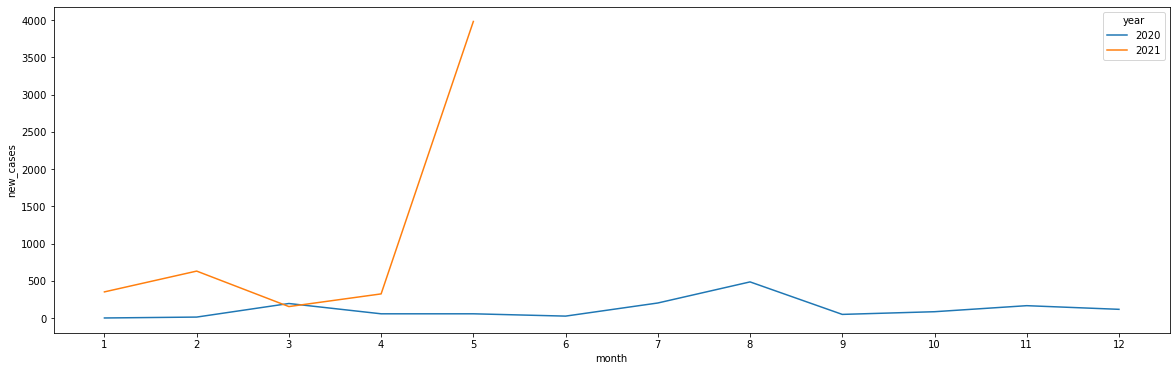

In [13]:
plt.figure(figsize =(20,6))
sns.lineplot(x=first_for_plot['month'],y=first_for_plot['new_cases'],hue=first_for_plot['year'])


### 3.2 Number of Covids by regions

<AxesSubplot:xlabel='name', ylabel='covidcases'>

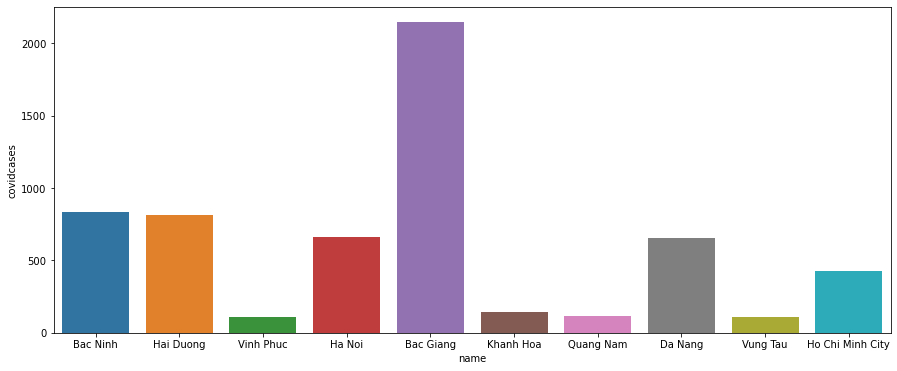

In [14]:
plt.figure(figsize=(15,6))
sns.barplot(x=region_infected['name'],y=region_infected['covidcases'])

### 3.3. Percentage of Covid Cases by Regions

In [15]:
import folium
from folium import Marker
from folium.plugins import MarkerCluster

In [17]:
vietnam_lat_long = [15.9030623,105.8066925]

map = folium.Map(location=vietnam_lat_long,zoom_start= 6)

# Add points to the map
mc = MarkerCluster()
for idx, region in vietnam_cases_by_region.iterrows(): 
    if not math.isnan(region['lat']) and not math.isnan(region['long']):
        mc.add_child(Marker(location=[region['lat'], region['long']],
                            tooltip=str(region['covidcases'])+" COVID cases"))
map.add_child(mc)

# Display the map
map